In [3]:
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000, )
assert y_test.shape == (10000, )

In [5]:
X_valid, X_train1 = X_train[:5000] / 255.0, X_train[5000: ]/255.0
y_valid, y_train1 = y_train[:5000] / 255.0, y_train[5000: ] / 255.0

In [6]:
model = Sequential()
model.add(Flatten(input_shape= [28, 28]))
model.add(Dense(30, activation= 'relu'))
model.add(Dense(20, activation= 'relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\disha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │        23,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,380 (95.23 KB)

 Trainable params: 24,380 (95.23 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [9]:
model.layers[1].name

'dense'

In [10]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer='sgd', metrics= ['accuracy'])

In [11]:
history = model.fit(X_train1, y_train1, epochs= 30, validation_data= (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 714us/step - accuracy: 0.1005 - loss: 0.0845 - val_accuracy: 0.0914 - val_loss: 0.0011
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.1022 - loss: 9.4667e-04 - val_accuracy: 0.0914 - val_loss: 5.1822e-04
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.1010 - loss: 4.8099e-04 - val_accuracy: 0.0914 - val_loss: 3.3573e-04
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.0997 - loss: 3.3169e-04 - val_accuracy: 0.0914 - val_loss: 2.4708e-04
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.1041 - loss: 2.3357e-04 - val_accuracy: 0.0914 - val_loss: 1.9487e-04
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.1006 - loss: 1.7979e-04 - val_accuracy: 0.0914 - val_loss: 1.6059e-04
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - accuracy: 0.1003 - loss: 1.4257e-04 - val_accuracy: 0.0914 - val_loss: 1.3639e-04
Epoch 8/30
1719/1719 ━━━━━━━

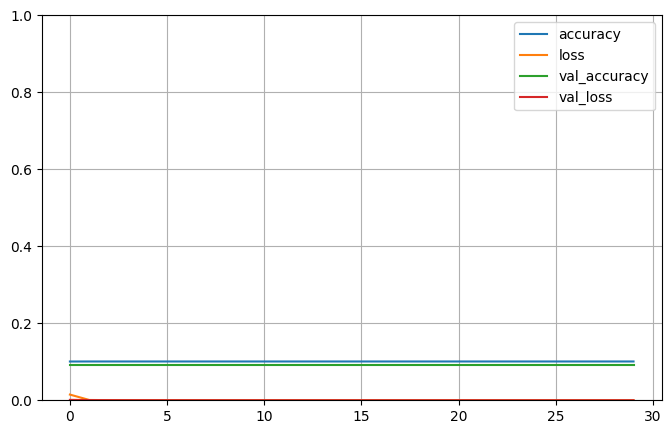

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize= (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()